<h1 align=center> Boston Housing Price Analysis

### Purpose: 
__This project analyzes Boston house price data using linear regression. This walks through some data exploratory analysis and fit a linear model to investigate important factors related to housing price using statsmodel libraries. It ends with linear model evaluation tools and some diagnostics.__

#### Boston House Prices dataset 
    -506 observations with 13 features 
    -Attribute Information:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per 10,000 USD
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in 1000 USD (Target Variable)

    -Creator: Harrison, D. and Rubinfeld, D.L.
    -This is a copy of UCI ML housing dataset. http://archive.ics.uci.edu/ml/datasets/Housing

## Part 1. Load Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  

import statsmodels.api as sm

from sklearn import datasets

In [2]:
# Load data
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# Include the median housevalue to our dataframe
y = pd.DataFrame(data.target, columns=['MEDV'])
df['MEDV'] = y

In [4]:
df.shape

(506, 14)

## Part 2. Exploratory Data Analysis

In [5]:
# check missingness
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
# get dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
# get summary of variables
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


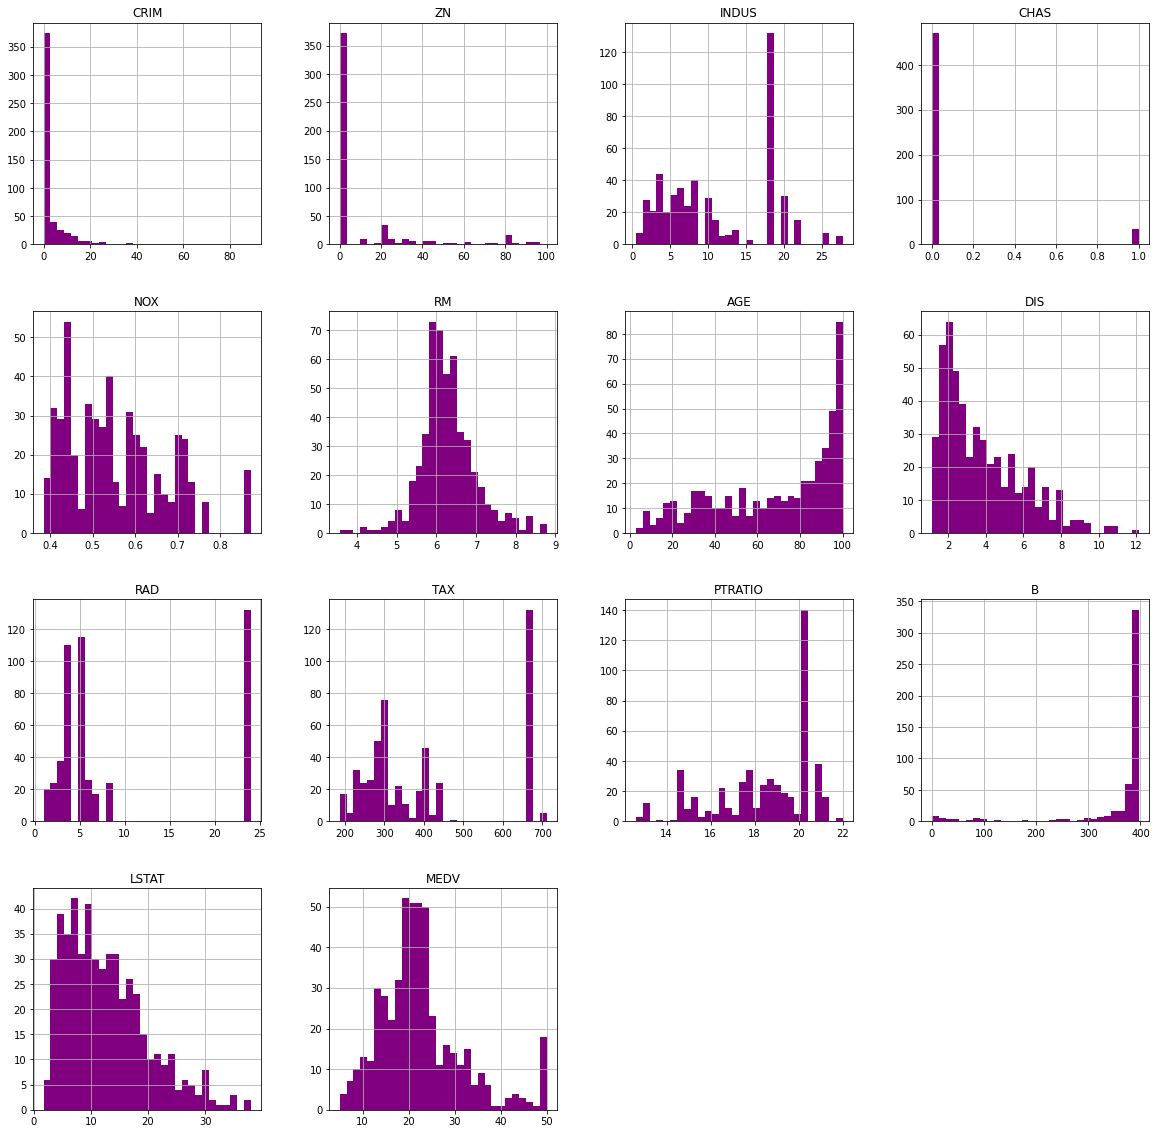

In [8]:
# display histogram of each feature
df.hist(bins=30, figsize=(20,20), color='purple')
plt.show()

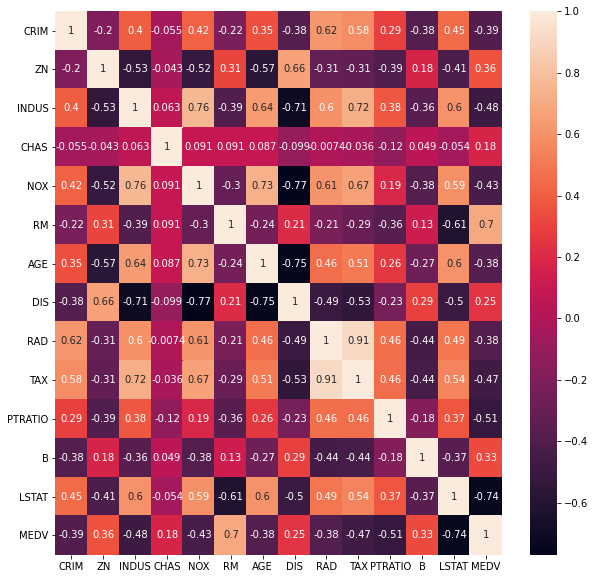

In [9]:
# display correlation matrix
corr_mat = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True)
plt.show()

In [10]:
# correlation with output variable
corr_medv = abs(corr_mat["MEDV"])

# selecting highly correlated features
relevant_features= corr_medv[corr_medv>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

RM, PTRARITO, and LSTAT are more correlated with MEDV than any other features in the dataset. This makes sense because houses with more rooms tend to me more expensive. We would also assume that houses in a neighborhood with lower proportion of socio-economically disadvantaged population and lower pupil-teacher ratio would be more expensive. 

Other relevant features are INDUS, NOX, and TAX.

For now, we will move forward with those six features that are seemingly important. 

In [11]:
columns_keep = ["RM", "PTRATIO", "LSTAT","INDUS", "NOX", "TAX"]
x = df.loc[:, columns_keep]
y = df['MEDV']

#### We will check their importances once more using Lasso.

Lasso is one of regularization methods, which penalize a feature given a coefficient threshold. If the feature is irrelevant, Lasso penalizes its coefficient and make it zero.

In [12]:
# Lasso
from sklearn.linear_model import LassoCV

lasso_reg = LassoCV()
lasso_reg.fit(x, y)

# Amount of penalization chosen by cross validation
print("Best alpha using built-in LassoCV: %f" % lasso_reg.alpha_)

# R2 of the model
print("Best score using built-in LassoCV: %f" %lasso_reg.score(x,y))

Best alpha using built-in LassoCV: 0.893593
Best score using built-in LassoCV: 0.652050


Text(0.5, 1.0, 'Feature importance using Lasso Model')

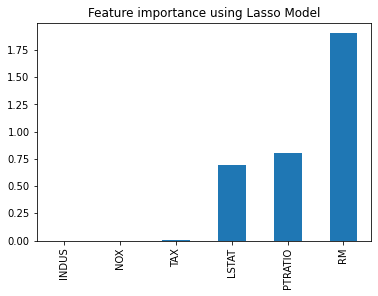

In [13]:
coef = pd.Series(lasso_reg.coef_, index = x.columns)
coef_abs = abs(coef)
coef_sort = coef_abs.sort_values()
plt.figure(figsize=(6,4))
coef_sort.plot(kind = "bar")
plt.title("Feature importance using Lasso Model")

RM, PTRATIO, LSTAT, and TAX are selected by Lasso as important features for predicting the house price (TAX coefficient is very close to zero, though). This is consistent with what we saw from the correlation table. We will move forward with the three most predictive features. 

In [14]:
columns_keep = ["RM", "PTRATIO", "LSTAT"]
x = x.loc[:,columns_keep]

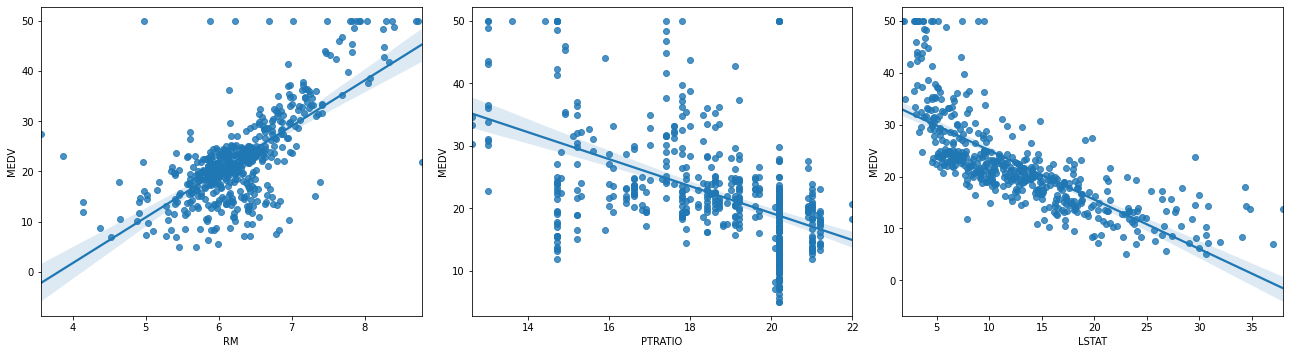

In [15]:
# plot scatterplot showing relationship between these three features and the housing value
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18, 5))
index = 0
axs = axs.flatten()
for i, k in enumerate(columns_keep):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=1, w_pad=1, h_pad=5)

## Part 3. Create multiple linear regression model

In [16]:
# adding an intercept to the model
x_ols = sm.add_constant(x) 

# fit the model
linear_reg = sm.OLS(y, x_ols).fit()

linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     353.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):          2.69e-123
Time:                        17:07:31   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3114.
Df Residuals:                     502   BIC:                             3131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5671      3.913      4.745      0.000      10.879      26.255
RM             4.5154      0.426     10.603      0.000       3.679       5.352
PTRATIO       -0.9307      0.118     -7.911      0.000      -1.162      -0.700
LSTAT         -0.5718      0.042    -13.540      0.000      -0.655      -0.489
==============================================================================
Omnibus:                      202.072   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1022.153
Skew:                           1.700   Prob(JB):                    1.10e-222
Kurtosis:                       9.076   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With this model, we have

$$ y = 18.57 + 4.51*RM - 0.93*PTRATIO - 0.57*LSTAT $$

This model indicates:

__PTRATIO__: The coefficient of -0.93 indicates that with one unit increase in pupil-teacher ratio, the median house value goes down by $930 on average, holding all other variables constant. Its T-statistics of -7.91 with p-value less than 0.001 indicates that PTRATIO is a statistically significant variable for estimatng the median house value.

__LSTAT__: With one percent increase in 'socio-economically lower population' of the town, the median house value goes down by $570 on average, holding all other features constant. 

__RM__: With an increase in the average number of rooms, the median house value of a town goes up by $4560 on average, holding all other variables constant.


    
Some more information from this models include:

__Adjusted R-squared__: This multiple linear regression explains 68% of the variance in the target variable, median house values, and 32% of the variance remains unexplained by this model. 

__F-statistics__: Its value of 353 with the nearly zero p-value indicates that our model fits the data better than the one without any predictor.


## Part 4. Evaluate the model
    1. Mean Absolute Error (MAE)
        - Measures the absolute difference between the actual and predicted values of y.    
        
    2. Mean Square Errors (MSE)
        - It squares the difference before summing the differences between the actual and predicted values of y.     
        
    3. Root Mean Square Error (RMSE)
        - It takes square root of MSE. This is useful because it matches the unit of the output value.

In [17]:
from sklearn import metrics
y_pred = linear_reg.predict(x_ols)


print('MAE:',metrics.mean_absolute_error(y, y_pred))
print('MSE:',metrics.mean_squared_error(y, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y, y_pred)))

MAE: 3.64179369683908
MSE: 27.13040575849706
RMSE: 5.208685607569059


These evaluation metrics would be more useful when we are comparing different models.

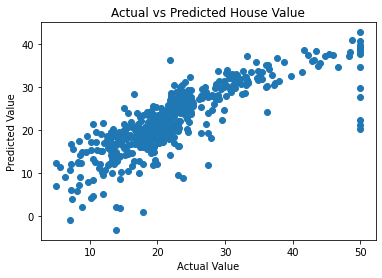

In [18]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y, y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted House Value")
plt.show()

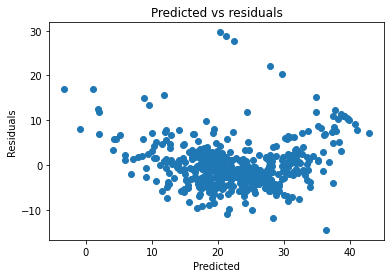

In [19]:
# Checking residuals
plt.scatter(y_pred,y-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

No visible pattern in this plot and values are distributed equally around zero. Linearity assumption doesn't seem to be violated.

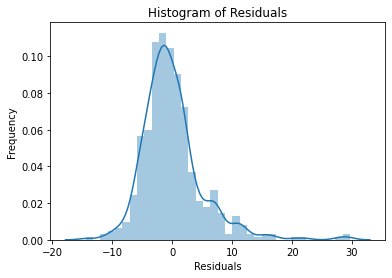

In [20]:
# Checking Normality of errors
sns.distplot(y-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Residuals seem to be normally distributed. 

## Conclusion and Next Steps

Among all of the variables in the Boston Housing Price dataset, we discovered that the pupil-teacher ratio and proportion of socio-economically disadvantaged population are most significant predictors for median housing price of a town, along with the average number of rooms. The results coincide with our intuition since houses in a good school districts tend to be more expensive and the pupil-teacher ratio is a good proxy for evaluating the quality of schools and school districts. Also, it isn't surprising that towns with higher proportion of socio-economically disadvantaged population have lower median house price.

This dataset is quite old; it would be great to get updated information for future analysis. Additionally, it would be helpful to collect more data on convenience to public transportation (# of bus routes and subways lines in the town) and approximity to college campuses in order to further our analysis.  